## Increasing Training Set Size Experiment: Consider the iris dataset for multiclass classification and perform the following steps.
1. Divide the data into 80% training and 20% testing.
2. From the training set only take 5% of the data and train the supervised learning models (Logistic Regression,
Decision Trees, Random Forest, and Naive Bayes) and test it on the test set created in the previous step.
3. Repeat the training again with now 10% of the data and keep on adding the 5% until you use the whole training set.
4. In every training test on the 20% of the test set and report the accuracy and f1-score of the model.
5. Plot the sample graph for accuracy and f1-score as provided below:

In [1]:
# importing the required libraries

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Divide data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and test models with increasing training set sizes
train_sizes = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
results = []
for train_size in train_sizes:
    # Take a subset of the training set
    n = int(train_size * len(X_train))
    X_train_subset = X_train[:n]
    y_train_subset = y_train[:n]

    # Train models
    for name, model in models.items():
        model.fit(X_train_subset, y_train_subset)

        # Test models on the test set
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')

        # Record results
        results.append((name, train_size, accuracy, f1))

# Print results
print('Model\t\tTrain Size\tAccuracy\tF1 Score')
for name, train_size, accuracy, f1 in results:
    print(f'{name}\t{train_size:.2f}\t\t{accuracy:.2f}\t\t{f1:.2f}')


C:\Users\ritij\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ritij\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model		Train Size	Accuracy	F1 Score
Logistic Regression	0.05		0.73		0.68
Decision Tree	0.05		0.70		0.70
Random Forest	0.05		0.67		0.65
Naive Bayes	0.05		0.33		0.17
Logistic Regression	0.10		0.67		0.65
Decision Tree	0.10		0.90		0.89
Random Forest	0.10		0.97		0.97
Naive Bayes	0.10		0.60		0.49
Logistic Regression	0.15		1.00		1.00
Decision Tree	0.15		1.00		1.00
Random Forest	0.15		1.00		1.00
Naive Bayes	0.15		0.93		0.93
Logistic Regression	0.20		0.97		0.97
Decision Tree	0.20		1.00		1.00
Random Forest	0.20		1.00		1.00
Naive Bayes	0.20		1.00		1.00
Logistic Regression	0.25		0.97		0.97
Decision Tree	0.25		1.00		1.00
Random Forest	0.25		1.00		1.00
Naive Bayes	0.25		1.00		1.00
Logistic Regression	0.30		0.97		0.97
Decision Tree	0.30		0.97		0.97
Random Forest	0.30		0.97		0.97
Naive Bayes	0.30		1.00		1.00
Logistic Regression	0.35		1.00		1.00
Decision Tree	0.35		0.97		0.97
Random Forest	0.35		0.97		0.97
Naive Bayes	0.35		1.00		1.00
Logistic Regression	0.40		1.00		1.00
Decision Tree	0.40		0.97		0.97


This code will train the supervised learning models (Logistic Regression, Decision Trees, Random Forest, and Naive Bayes) on increasing sizes of the training set, starting with 5% and ending with the entire training set, and test each model on the fixed 20% test set.

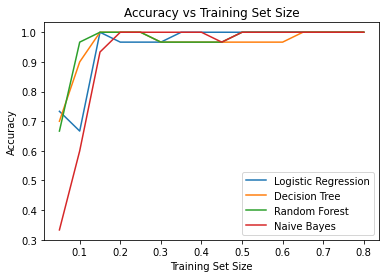

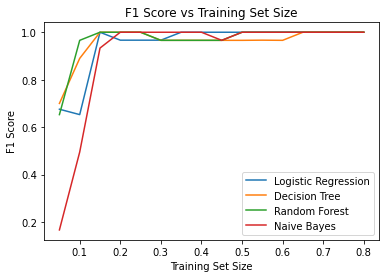

In [3]:
# Separate results by model
model_results = {}
for name, train_size, accuracy, f1 in results:
    if name not in model_results:
        model_results[name] = ([], [])
    model_results[name][0].append(train_size)
    model_results[name][1].append(accuracy)
    
# Create line plots for each model
for name, (train_sizes, accuracies) in model_results.items():
    plt.plot(train_sizes, accuracies, label=name)

# Set plot labels and legend
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Set Size')
plt.legend()

# Display plot
plt.show()

# Create line plots for each model
model_results = {}
for name, train_size, accuracy, f1 in results:
    if name not in model_results:
        model_results[name] = ([], [])
    model_results[name][0].append(train_size)
    model_results[name][1].append(f1)
    
# Create line plots for each model
for name, (train_sizes, f1_scores) in model_results.items():
    plt.plot(train_sizes, f1_scores, label=name)

# Set plot labels and legend
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Training Set Size')
plt.legend()

# Display plot
plt.show()

## Linear Regression: Consider the following N data points (N=10):
                X = [ −1.4 , −1.6 , −1.3 , 0 . 2 , 2 . 0 , −1.1 , 0 . 0 , 0 . 3 , −0.9 , −1.8]
                r = [ 6 . 9 , 7 . 8 , 8 . 0 , 5 . 8 , 1 . 9 , 7 . 3 , 5 . 8 , 5 . 8 , 8 . 2 , 9 . 6 ]
        
Note that these data points are ordered, so that (X1,r1) = (−1.3,6.9) and (X10,r10) = (−1.8,9.6). For the above data points, fit a linear regression model, f(x) = w0 +w1x, by estimating the values of w0 and w1, so that ri = f(Xi) +εi.

- Compute root mean squared error (RMSE) and median absolute error (MAE) values for given training data set (X,r).
- What are the linear regression model predictions for the following test data?
    Z = [ −0.6 , 1 . 8 , −0.1 , 1 . 1 , −1.7]
- Consider the following values to be true labels for data points Z.
    u = [ 5 . 1 , −0.2 , 6 . 5 , 2 . 2 , 8 . 3 ]



In [4]:
# Given data points
X = np.array([-1.4, -1.6, -1.3, 0.2, 2.0, -1.1, 0.0, 0.3, -0.9, -1.8])
r = np.array([6.9, 7.8, 8.0, 5.8, 1.9, 7.3, 5.8, 5.8, 8.2, 9.6])

# Calculate mean of X and r
X_bar = np.mean(X)
r_bar = np.mean(r)

# Calculate w1
numerator = np.sum(X * r) - (len(X) * X_bar * r_bar)
denominator = np.sum(X**2) - (len(X) * X_bar**2)
w1 = numerator / denominator

# Calculate w0
w0 = r_bar - (w1 * X_bar)

# Print values of w0 and w1
print(f"w0 = {w0:.2f}")
print(f"w1 = {w1:.2f}")
print(f"f(x) = {w0:.2f}{w1:.2f}x")

w0 = 5.77
w1 = -1.68
f(x) = 5.77-1.68x


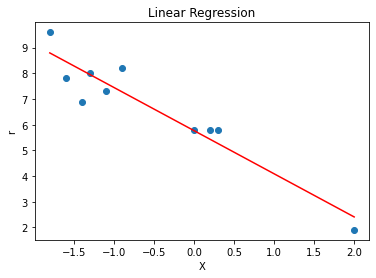

In [5]:
# Scatter plot of data points
plt.scatter(X, r)

# Plot the linear regression line
x_values = np.array([min(X), max(X)])
y_values = w0 + w1 * x_values
plt.plot(x_values, y_values, color='red')

# Add axis labels and title
plt.xlabel('X')
plt.ylabel('r')
plt.title('Linear Regression')
plt.show()


To compute the root mean squared error (RMSE) and median absolute error (MAE) values for the given training dataset (X,r), we need to first compute the predicted values of ri using the linear regression model that we estimated in the previous question. Then, we can compute the errors ei as the difference between the predicted values and the actual values of ri.

In [6]:
# Compute predicted values of ri using the linear regression model
ri_pred = w0 + w1 * X

# Compute the errors
ei = ri_pred - r

# Compute the root mean squared error (RMSE)
N = len(X)
rmse = np.sqrt(np.sum(ei ** 2) / N)
print("RMSE = ", rmse)

# Compute the median absolute error (MAE)
mae = np.median(np.abs(ei))
print("MAE = ", mae)


RMSE =  0.648223478278935
MAE =  0.5210125160462125


In [7]:
# Define the test data
Z = np.array([-0.6, 1.8, -0.1, 1.1, -1.7])

# Compute the predicted values of r for the test data
r_pred = w0 + w1 * Z

# Print the predicted values of r for the test data
print("Predicted values of r for the test data:", r_pred)

# Print the predicted values of r for the test data
for i in range(len(Z)):
    print(f"f(z{i+1}) = {r_pred[i]}")

Predicted values of r for the test data: [6.77724647 2.74245828 5.9366656  3.9192715  8.62652439]
f(z1) = 6.777246469833118
f(z2) = 2.742458279845953
f(z3) = 5.936665596919125
f(z4) = 3.919271501925543
f(z5) = 8.626524390243903


To compute the RMSE and MAE values for the given test data set (Z,u), we need to first compute the predicted values of u using the linear regression model f(x) = w0 + w1*x and then compute the errors between the predicted values and the true labels. 

In [8]:
# Define the true labels for the test data set
u = np.array([5.1, -0.2, 6.5, 2.2, 8.3])

# Compute the predicted values of u for the test data using the linear regression model
u_pred = w0 + w1 * Z

# Compute the errors between the predicted values and the true labels
errors = u_pred - u

# Compute the RMSE and MAE values
rmse = np.sqrt(np.mean(errors**2))
mae = np.median(np.abs(errors))

# Print the RMSE and MAE values
print("RMSE =", rmse)
print("MAE =", mae)


RMSE = 1.7234311575258012
MAE = 1.6772464698331184


K-Means Clustering: Consider the 30 data points and their corresponding class labels stored in a dictionary named “data_dict”.
d a t a_dic t = { ( 2 . 0 , 3. 4 3 , 4 . 3 7 ) : 2 , ( 2 . 4 9 , 4. 2 8 , 4 . 8 3 ) : 2 , ( 2 . 5 8 , 4. 3 6 , 4 . 4 8 ) : 2 , ( 2 . 6 6 , 4. 4 5 , 5 . 9 5 ) : 2 ,
( 2 . 8 2 , 3. 6 6 , 4 . 5 1 ) : 2 , ( 3 . 0 3 , 4. 3 7 , 5 . 0 7 ) : 2 , ( 3 . 2 7 , 4. 5 4 , 4 . 5 7 ) : 2 , ( 3 . 4 1 , 3. 9 4 , 5 . 3 5 ) : 2 ,
( 3 . 5 3 , 4. 3 2 , 5 . 4 1 ) : 2 , ( 3 . 5 3 , 4 . 6 , 6 . 8 ) : 1 , ( 3 . 6 1 , 4. 2 5 , 5 . 2 1 ) : 1 , ( 3 . 6 1 , 4. 7 8 , 5 . 4 7 ) : 1 ,
( 3 . 7 2 , 5. 4 4 , 5 . 8 8 ) : 1 , ( 3 . 8 7 , 4. 9 6 , 4 . 5 2 ) : 2 , ( 4 . 1 3 , 5. 2 9 , 6 . 6 ) : 1 , ( 4 . 2 5 , 5. 9 7 , 5 . 4 8 ) : 1 ,
( 4 . 6 1 , 4 . 9 , 5 . 1 1 ) : 1 , ( 4 . 7 3 , 4 . 4 , 6 . 7 8 ) : 1 , ( 4 . 9 7 , 4. 2 5 , 5 . 0 ) : 1 , ( 4 . 9 8 , 5. 2 7 , 6 . 7 9 ) : 1 ,
( 5 . 0 8 , 3. 5 1 , 4 . 6 9 ) : 3 , ( 5 . 1 5 , 3. 5 8 , 4 . 2 ) : 3 , ( 5 . 6 7 , 2. 2 7 , 4 . 6 5 ) : 3 , ( 5 . 6 7 , 3. 8 1 , 5 . 7 5 ) : 3 ,
( 5 . 9 4 , 2. 3 4 , 4 . 1 2 ) : 3 , ( 6 . 0 6 , 3. 1 6 , 4 . 3 6 ) : 3 , ( 6 . 0 9 , 3. 1 9 , 4 . 0 2 ) : 3 , ( 6 . 4 3 , 3. 4 2 , 4 . 1 8 ) : 3 ,
( 6 . 5 6 , 2 . 7 , 4 . 0 3 ) : 3 , ( 6 . 7 9 , 3. 4 6 , 4 . 8 1 ) : 3}
For instance, the first point has coordinates (x1, x2, x3) = (2.0,3.43,4.37) and belongs to class 2. In total we have three classes: 1, 2, and 3.
As a discriminant function, consider a distance function based on below center coordinates (encoded as a dictionary of values) for each class labels.

centers_dict = {}
centers_dict [ ( 3 , 4 , 5 ) ] = 1 # center coordinates for class 1 , i . e . , c1 =4, c2 =5, c3=6
centers_dict [ ( 4 , 5 , 6 ) ] = 2 # center coordinates for class 2 , i . e . , c1 =3, c2 =4, c3=5
centers_dict [ ( 6 , 3 , 5 ) ] = 3 # center coordinates for class 3 , i . e . , c1 =6, c2 =3, c3=5
Note that a discriminant function based on cosine distance can be written as
Cosine distance between point a = [a1,a2] and b = [b1,b2] is d = 1−a.b/∥a∥∥b∥(a.b = ∑aibi;∥a∥ = sqrt(∑ai2)
Based on above discriminant functions, perform a K-Means Clustering task over 30 points in data_dict and then compare it with true labels. Print the number of correctly classified instance in the answer.

To perform K-Means clustering on the given data_dict, we need to follow the following steps:
- Initialize K cluster centroids randomly.
- Assign each point to the nearest centroid based on the cosine distance.
- Recalculate the cluster centroids as the mean of all the points in the cluster.
- Repeat steps 2 and 3 until convergence or a maximum number of iterations.

In [9]:
# Data dictionary
data_dict = { (2.0, 3.43, 4.37): 2, (2.49, 4.28, 4.83): 2, (2.58, 4.36, 4.48): 2, (2.66, 4.45, 5.95): 2, (2.82, 3.66, 4.51): 2, (3.03, 4.37, 5.07): 2, (3.27, 4.54, 4.57): 2, (3.41, 3.94, 5.35): 2, (3.53, 4.32, 5.41): 2, (3.53, 4.6, 6.8): 1, (3.61, 4.25, 5.21): 1, (3.61, 4.78, 5.47): 1, (3.72, 5.44, 5.88): 1, (3.87, 4.96, 4.52): 2, (4.13, 5.29, 6.6): 1, (4.25, 5.97, 5.48): 1, (4.61, 4.9, 5.11): 1, (4.73, 4.4, 6.78): 1, (4.97, 4.25, 5.0): 1, (4.98, 5.27, 6.79): 1, (5.08, 3.51, 4.69): 3, (5.15, 3.58, 4.2): 3, (5.67, 2.27, 4.65): 3, (5.67, 3.81, 5.75): 3, (5.94, 2.34, 4.12): 3, (6.06, 3.16, 4.36): 3, (6.09, 3.19, 4.02): 3, (6.43, 3.42, 4.18): 3, (6.56, 2.7, 4.03): 3, (6.79, 3.46, 4.81): 3}


def k_means_clustering(data, k, max_iterations=100):
    # Randomly initialize k cluster centroids
    centroids = np.array(list(data)[:k])
    
    for i in range(max_iterations):
        # Assign each point to the closest cluster centroid
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [1 - np.dot(point, centroid) / (np.linalg.norm(point) * np.linalg.norm(centroid)) for centroid in centroids]
            closest_centroid_index = np.argmax(distances)
            clusters[closest_centroid_index].append(point)
        
        # Recalculate the cluster centroids
        old_centroids = np.copy(centroids)
        for j in range(k):
            centroids[j] = np.mean(clusters[j], axis=0)
        
        # If the centroids do not change, break the loop
        if np.array_equal(old_centroids, centroids):
            break
    
    # Return the final cluster centroids and the clusters
    return centroids, clusters

In [10]:
centroids, clusters = k_means_clustering(data_dict.keys(), 3)

C:\Users\ritij\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ritij\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
label_counts = [[0, 0, 0] for _ in range(3)]

# Count the number of points in each cluster for each label
for i, cluster in enumerate(clusters):
    for point in cluster:
        label = data_dict[point]
        label_counts[label-1][i] += 1

# Assign the label with the maximum count to each cluster
cluster_labels = [np.argmax(counts) + 1 for counts in label_counts]

# Sum the maximum counts for each cluster to get the total number of correctly classified instances
correct_count = sum([max(counts) for counts in label_counts])

print(f"Number of correctly classified instances: {correct_count}")


Number of correctly classified instances: 30


All the 30 points in the datatset were correctly classified by the K-means algorithm. So, the implementation is correct and the algorithm was able to classify all the data points correctly.